<a href="https://colab.research.google.com/github/PLEX-GR00T/Data_Mining/blob/main/MobileNet_v1_TF2_TFT_RT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pip installs and imports

In [ ]:
!nvidia-smi
%cd /content

Sun May 22 18:01:40 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install pillow matplotlib
!pip install tensorflow-gpu==2.0.0

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

In [ ]:
print("Version: ", tf.__version__)
print("Hub version: ", hub.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

Version:  2.0.0
Hub version:  0.12.0
Eager mode:  True
GPU is available


In [ ]:
import pandas as pd

# Increase precision of presented data for better side-by-side comparison
pd.set_option("display.precision", 8)

In [ ]:
import tensorflow as tf
print("Tensorflow version: ", tf.version.VERSION)

Tensorflow version:  2.0.0


# Load Data

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir /content/drive/MyDrive/kaggle

mkdir: cannot create directory ‘/content/drive/MyDrive/kaggle’: File exists


In [ ]:
!ls /content/drive/MyDrive/kaggle

kaggle.json


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"

In [ ]:
%cd /content/drive/MyDrive/kaggle

/content/drive/MyDrive/kaggle


# Load the data

In [ ]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

gtsrb-german-traffic-sign.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
%ls

kaggle.json


In [ ]:
!kaggle config set -n path -v /content

- path is now set to: /content


In [ ]:
!kaggle config view #View current config values

Configuration values from /content/drive/MyDrive/kaggle
- username: gr00t16
- path: /content
- proxy: None
- competition: None


In [ ]:
%cd /content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

/content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign


In [ ]:
!unzip -qq gtsrb-german-traffic-sign.zip

In [ ]:
# !cp -R gtsrb-german-traffic-sign /content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

In [ ]:
#changing the working directory
%cd /content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
!pwd
!ls

/content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
/content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
gtsrb-german-traffic-sign.zip				     test
meta							     Test
Meta							     Test.csv
Meta.csv						     train
model_TF2						     Train
nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb    Train.csv
nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb.1  training_1


In [ ]:
%ls

gtsrb-german-traffic-sign.zip                                test/
meta/                                                        Test/
Meta/                                                        Test.csv
Meta.csv                                                     train/
model_TF2/                                                   Train/
nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb    Train.csv
nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb.1  training_1/


In [ ]:
os.chdir('/content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/')
%ls

gtsrb-german-traffic-sign.zip                                test/
meta/                                                        Test/
Meta/                                                        Test.csv
Meta.csv                                                     train/
model_TF2/                                                   Train/
nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb    Train.csv
nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb.1  training_1/


In [ ]:
train_df = pd.read_csv('Train.csv')
# display a sneak peek of the data
train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [ ]:
print(f'Number of classes: {train_df.ClassId.unique().shape[0]}')

Number of classes: 43


In [ ]:
labels = ['20 km/h', '30 km/h', '50 km/h', '60 km/h', '70 km/h', '80 km/h', '80 km/h end', '100 km/h', '120 km/h', 'No overtaking',
               'No overtaking for trucks', 'Crossroad with secondary way', 'Main road', 'Give way', 'Stop', 'Road up', 'Road up for truck', 'No entry',
               'Other dangerous', 'Turn left', 'Turn right', 'Winding road', 'Hollow road', 'Slippery road', 'Narrowing road', 'Roadwork', 'Traffic light',
               'Pedestrian', 'Children', 'Bike', 'Snow', 'Deer', 'End of the limits', 'Only right', 'Only left', 'Only straight', 'Only straight and right', 
               'Only straight and left', 'Take right', 'Take left', 'Circle crossroad', 'End of overtaking limit', 'End of overtaking limit for truck']

In [ ]:
# add column with readable labels
train_df['Label'] = train_df['ClassId'].replace(sorted(train_df['ClassId'].unique()), labels)
# print updated df
train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path,Label
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png,Turn right
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png,Turn right
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png,Turn right
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png,Turn right
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png,Turn right


In [ ]:
train_df.shape

(39209, 9)

In [ ]:
base_dir = '/content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/Train'
print(base_dir)

/content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/Train


In [ ]:
IMAGE_SIZE = 160
BATCH_SIZE = 64

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2) #Normalizing

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='training')#dividing image_size, batch_size

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='validation')

Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


In [ ]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape #each image is of size ??x??x??

((64, 160, 160, 3), (64, 43))

In [ ]:
from time import time
#performing same process on the dataset
model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/feature_vector/5",
                   trainable=False),  # Can be True, see below.
    tf.keras.layers.Dense(43, activation='softmax')
])
model.build([None, 160, 160, 3]) 

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  829536    
_________________________________________________________________
dense (Dense)                multiple                  22059     
Total params: 851,595
Trainable params: 22,059
Non-trainable params: 829,536
_________________________________________________________________


In [ ]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['acc'])

In [ ]:
!pip install pyyaml h5py 

In [ ]:
# Run model training
from time import time
#performing same process on the dataset
start_opt = time()
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(val_generator.samples/val_generator.batch_size)

checkpoint_path = "training_1/cp.ckpt" ##training saves weights that are done during training
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
hist = model.fit(
    train_generator, 
    epochs=30,
    verbose=1,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_generator,
    validation_steps=val_steps_per_epoch,
    callbacks=[cp_callback]).history
finish_opt = time()
f"Execution time with TensorFlow to train: {(finish_opt - start_opt):.2f} s"

Train for 491.0 steps, validate for 123.0 steps
Epoch 1/10
489/491 [============================>.] - ETA: 0s - loss: 1.5670 - acc: 0.5754
Epoch 00001: saving model to training_1/cp.ckpt
491/491 [==============================] - 50s 102ms/step - loss: 1.5638 - acc: 0.5762 - val_loss: 1.5182 - val_acc: 0.5495
Epoch 2/10
489/491 [============================>.] - ETA: 0s - loss: 0.7528 - acc: 0.8004
Epoch 00002: saving model to training_1/cp.ckpt
491/491 [==============================] - 46s 93ms/step - loss: 0.7528 - acc: 0.8005 - val_loss: 1.3395 - val_acc: 0.6148
Epoch 3/10
488/491 [============================>.] - ETA: 0s - loss: 0.5570 - acc: 0.8561
Epoch 00003: saving model to training_1/cp.ckpt
491/491 [==============================] - 34s 70ms/step - loss: 0.5569 - acc: 0.8559 - val_loss: 1.3003 - val_acc: 0.6304
Epoch 4/10
490/491 [============================>.] - ETA: 0s - loss: 0.4553 - acc: 0.8818
Epoch 00004: saving model to training_1/cp.ckpt
491/491 [=================

'Execution time with TensorFlow to train: 376.48 s'

In [ ]:
prediction = time()
final_loss, final_accuracy = model.evaluate(val_generator, steps = val_steps_per_epoch)
predictend = time() - prediction
f"Inference time with TensorFlow : {(predictend):.2f} s"

123/123 [==============================] - 7s 55ms/step - loss: 1.3205 - acc: 0.6526


'Inference time with TensorFlow : 6.82 s'

In [ ]:
model_TF2 = model

In [ ]:
model_TF2.save("model_TF2")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Assets written to: model_TF2/assets


INFO:tensorflow:Assets written to: model_TF2/assets


In [ ]:
inf_time_x_axis = [0, 0, 0, 0]
inf_acc_x_axis = [0, 0, 0, 0]
x_labels = ['TF2.0', 'FP32', 'FP16', 'INT8']

# inf_time_x_axis.append(predictend)
# inf_acc_x_axis[0] = final_accuracy

# Install TensorFlow-GPU 2.0
# Install TensorRT Runtime

In [ ]:
!pip install pillow matplotlib
!pip install tensorflow-gpu==2.0.0

In [ ]:
import tensorflow as tf
print("Tensorflow version: ", tf.version.VERSION)

Tensorflow version:  2.0.0


In [ ]:
%%bash
wget https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64/nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb

dpkg -i nvidia-machine-learning-repo-*.deb
apt-get update

sudo apt-get install libnvinfer5

(Reading database ... 155650 files and directories currently installed.)
Preparing to unpack nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb ...
Unpacking nvidia-machine-learning-repo-ubuntu1804 (1.0.0-1) over (1.0.0-1) ...
Setting up nvidia-machine-learning-repo-ubuntu1804 (1.0.0-1) ...
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:4 http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:9 http://security.ubuntu.com/ubuntu bionic-security InRelease
H

--2022-05-22 18:17:52--  https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64/nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2926 (2.9K) [application/x-deb]
Saving to: ‘nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb.2’

     0K ..                                                    100%  142M=0s

2022-05-22 18:17:52 (142 MB/s) - ‘nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb.2’ saved [2926/2926]

W: Target Packages (Packages) is configured multiple times in /etc/apt/sources.list.d/nvidia-machine-learning.list:1 and /etc/apt/sources.list.d/nvidia-ml.list:1
W: Target Packages (Packages) is configured multiple times in /etc/apt/sources.list.d/nvidia-machine-learning.list:1

In [ ]:
# check TensorRT version
print("TensorRT version: ")
!dpkg -l | grep nvinfer

TensorRT version: 
ii  libnvinfer5                             5.1.5-1+cuda10.1                    amd64        TensorRT runtime libraries


# Check Tensor core GPU

In [ ]:
from tensorflow.python.client import device_lib

def check_tensor_core_gpu_present():
    local_device_protos = device_lib.list_local_devices()
    for line in local_device_protos:
        if "compute capability" in str(line):
            compute_capability = float(line.physical_device_desc.split("compute capability: ")[-1])
            if compute_capability>=7.0:
                return True
    
print("Tensor Core GPU Present:", check_tensor_core_gpu_present())
tensor_core_gpu = check_tensor_core_gpu_present()

Tensor Core GPU Present: None


# Importing required libraries

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os
import time

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.python.compiler.tensorrt import trt_convert as trt
from tensorflow.keras.preprocessing import image
from tensorflow.python.saved_model import tag_constants

# TF2.0 Inference: (model_TF2)

In [ ]:
model = tf.keras.models.load_model("/content/model_TF2")

/content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/test
prediction shape:  (1, 43)
Predicted Image class: End of the limits
prediction shape:  (1, 43)
Predicted Image class: Children
prediction shape:  (1, 43)
Predicted Image class: No overtaking
prediction shape:  (1, 43)
Predicted Image class: No overtaking


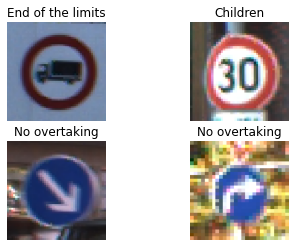

In [ ]:
%cd /content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/test
for i in range(4):
  img_path = './0000%d.png'%i
  img = image.load_img(img_path, target_size=(160, 160))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  preds = model.predict(x)
  print("prediction shape: ", preds.shape)
  classes = np.argmax(preds, axis = 1)
  print('Predicted Image class:', labels[int(classes)])
  plt.subplot(2,2,i+1)
  plt.imshow(img);
  plt.axis('off');
  plt.title(labels[int(classes)])

In [ ]:
%cd /content
model_TF2.save("model_TF2")

/content
INFO:tensorflow:Assets written to: model_TF2/assets


INFO:tensorflow:Assets written to: model_TF2/assets


In [ ]:
!saved_model_cli show --all --dir model_TF2


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['input_1'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 160, 160, 3)
        name: serving_default_input_1:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['output_1'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 43)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict


In [ ]:
%cd /content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/test

/content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/test


In [ ]:
batch_size = 8
batched_input = np.zeros((batch_size, 160, 160, 3), dtype=np.float32)

for i in range(batch_size):
  img_path = './0000%d.png' % (i % 4)
  img = image.load_img(img_path, target_size=(160, 160))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  batched_input[i, :] = x
batched_input = tf.constant(batched_input)
print('batched_input shape: ', batched_input.shape)

batched_input shape:  (8, 160, 160, 3)


In [ ]:
# Benchmarking throughput
import time
N_warmup_run = 50
N_run = 1000
elapsed_time = []

for i in range(N_warmup_run):
  preds = model.predict(batched_input)

st_fullbatch = time.time()

for i in range(N_run):
  start_time = time.time()
  preds = model.predict(batched_input)
  end_time = time.time()
  elapsed_time = np.append(elapsed_time, end_time - start_time)
  if i % 50 == 0:
    print('Step {}: {:4.1f}ms'.format(i, (elapsed_time[-50:].mean()) * 1000))

t_fullbatch = time.time() - st_fullbatch

print('Throughput: {:.0f} images/s'.format(N_run * batch_size / elapsed_time.sum()))
print(f'Total Time: {t_fullbatch:.4f}s')

Step 0: 32.7ms
Step 50: 37.4ms
Step 100: 31.4ms
Step 150: 37.7ms
Step 200: 29.4ms
Step 250: 40.8ms
Step 300: 56.7ms
Step 350: 31.7ms
Step 400: 39.1ms
Step 450: 63.1ms
Step 500: 82.0ms
Step 550: 43.1ms
Step 600: 30.0ms
Step 650: 31.1ms
Step 700: 43.9ms
Step 750: 31.1ms
Step 800: 32.5ms
Step 850: 32.8ms
Step 900: 31.7ms
Step 950: 31.1ms
Throughput: 200 images/s
Total Time: 40.1370s


In [ ]:
# inf_time_x_axis[0] = t_fullbatch
inf_time_x_axis[0] = 40.136964082717896
print(inf_time_x_axis)

[40.136964082717896, 0, 0, 0]


# Convert TF2.0 model to TF-TRT FP32 model

In [ ]:
print('Converting TF2.0 model to TF-TRT FP32...')
conversion_params = trt.DEFAULT_TRT_CONVERSION_PARAMS._replace(
    precision_mode=trt.TrtPrecisionMode.FP32,
    max_workspace_size_bytes=8000000000
)

converter = trt.TrtGraphConverterV2(
    input_saved_model_dir='/content/model_TF2',
    conversion_params=conversion_params
)

converter.convert()
converter.save(output_saved_model_dir='model_TFTRT_FP32')
print('Done Converting to TF-TRT FP32')

Converting TF2.0 model to TF-TRT FP32...
INFO:tensorflow:Linked TensorRT version: (5, 1, 5)


INFO:tensorflow:Linked TensorRT version: (5, 1, 5)


INFO:tensorflow:Loaded TensorRT version: (5, 1, 5)


INFO:tensorflow:Loaded TensorRT version: (5, 1, 5)


INFO:tensorflow:Running against TensorRT version 5.1.5


INFO:tensorflow:Running against TensorRT version 5.1.5


INFO:tensorflow:Assets written to: model_TFTRT_FP32/assets


INFO:tensorflow:Assets written to: model_TFTRT_FP32/assets


Done Converting to TF-TRT FP32


In [ ]:
!saved_model_cli show --all --dir model_TFTRT_FP32


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['input_1'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 160, 160, 3)
        name: serving_default_input_1:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['output_1'] tensor_info:
        dtype: DT_FLOAT
        shape: unknown_rank
        name: PartitionedCall:0
  Method name is: tensorflow/serving/predict


In [ ]:
def benchmark_tftrt(input_saved_model):
    saved_model_loaded = tf.saved_model.load(input_saved_model, tags=[tag_constants.SERVING])
    infer = saved_model_loaded.signatures['serving_default']

    N_warmup_run = 50
    N_run = 1000
    elapsed_time = []



    for i in range(N_warmup_run):
      labeling = infer(batched_input)
    
    st_fullbatch = time.time()

    for i in range(N_run):
      start_time = time.time()
      labeling = infer(batched_input)
      #prob = labeling['probs'].numpy()
      end_time = time.time()
      elapsed_time = np.append(elapsed_time, end_time - start_time)
      if i % 50 == 0:
        print('Step {}: {:4.1f}ms'.format(i, (elapsed_time[-50:].mean()) * 1000))

    t_fullbatch = time.time() - st_fullbatch
    print('Throughput: {:.0f} images/s'.format(N_run * batch_size / elapsed_time.sum()))
    print(f'Total time: {t_fullbatch:.4f}s')
    return t_fullbatch

In [ ]:
t_fullbatch = benchmark_tftrt('model_TFTRT_FP32')

Step 0:  1.2ms
Step 50:  1.2ms
Step 100:  1.2ms
Step 150:  1.3ms
Step 200:  1.3ms
Step 250:  1.5ms
Step 300:  1.6ms
Step 350:  1.8ms
Step 400:  1.6ms
Step 450:  1.2ms
Step 500:  1.3ms
Step 550:  1.2ms
Step 600:  1.2ms
Step 650:  1.2ms
Step 700:  1.3ms
Step 750:  1.2ms
Step 800:  1.2ms
Step 850:  2.1ms
Step 900:  2.1ms
Step 950:  1.5ms
Throughput: 5687 images/s
Total time: 1.4388s


In [ ]:
# inf_time_x_axis[1] = t_fullbatch
inf_time_x_axis[1] = 1.438750982284546
print(inf_time_x_axis)

[40.136964082717896, 1.438750982284546, 0, 0]


# Convert TF2.0 model to TF-TRT FP16 model

In [ ]:
print('Converting TF2.0 model to TF-TRT FP16...')
conversion_params = trt.DEFAULT_TRT_CONVERSION_PARAMS._replace(
    precision_mode=trt.TrtPrecisionMode.FP16,
    max_workspace_size_bytes=8000000000
)

converter = trt.TrtGraphConverterV2(
    input_saved_model_dir='/content/model_TF2',
    conversion_params=conversion_params
)

converter.convert()
converter.save(output_saved_model_dir='model_TFTRT_FP16')
print('Done Converting to TF-TRT FP16')

Converting TF2.0 model to TF-TRT FP16...
INFO:tensorflow:Linked TensorRT version: (5, 1, 5)


INFO:tensorflow:Linked TensorRT version: (5, 1, 5)


INFO:tensorflow:Loaded TensorRT version: (5, 1, 5)


INFO:tensorflow:Loaded TensorRT version: (5, 1, 5)


INFO:tensorflow:Running against TensorRT version 5.1.5


INFO:tensorflow:Running against TensorRT version 5.1.5


INFO:tensorflow:Assets written to: model_TFTRT_FP16/assets


INFO:tensorflow:Assets written to: model_TFTRT_FP16/assets


Done Converting to TF-TRT FP16


In [ ]:
t_fullbatch = benchmark_tftrt('model_TFTRT_FP16')

Step 0:  1.2ms
Step 50:  1.3ms
Step 100:  1.3ms
Step 150:  1.2ms
Step 200:  1.4ms
Step 250:  1.4ms
Step 300:  1.2ms
Step 350:  1.2ms
Step 400:  1.3ms
Step 450:  1.2ms
Step 500:  1.2ms
Step 550:  1.2ms
Step 600:  1.4ms
Step 650:  1.2ms
Step 700:  1.2ms
Step 750:  1.2ms
Step 800:  1.2ms
Step 850:  1.4ms
Step 900:  1.4ms
Step 950:  1.4ms
Throughput: 6253 images/s
Total time: 1.3114s


In [ ]:
# inf_time_x_axis[2] = t_fullbatch
inf_time_x_axis[2] = 1.311415433883667
print(inf_time_x_axis)

[40.136964082717896, 1.438750982284546, 1.311415433883667, 0]


# Convert TF2.0 model to TF-TRT INT8 model

In [ ]:
# Restart notebook runtime before proceeding?

In [ ]:
print('Converting TF2.0 model to TF-TRT INT8...')
conversion_params = trt.DEFAULT_TRT_CONVERSION_PARAMS._replace(
    precision_mode=trt.TrtPrecisionMode.INT8,
    max_workspace_size_bytes=8000000000,
    use_calibration=True
)

converter = trt.TrtGraphConverterV2(
    input_saved_model_dir='/content/model_TF2',
    conversion_params=conversion_params
)

def calibration_input_fn():
    yield (batched_input, )

converter.convert(calibration_input_fn=calibration_input_fn)

converter.save(output_saved_model_dir='model_TFTRT_INT8')
print('Done Converting to TF-TRT INT8')

Converting TF2.0 model to TF-TRT INT8...
INFO:tensorflow:Linked TensorRT version: (5, 1, 5)
INFO:tensorflow:Loaded TensorRT version: (5, 1, 5)
INFO:tensorflow:Running against TensorRT version 5.1.5
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model_TFTRT_INT8/assets
Done Converting to TF-TRT INT8


In [ ]:
t_fullbatch = benchmark_tftrt('model_TFTRT_INT8')

Step 0:  1.3ms
Step 50:  1.3ms
Step 100:  1.3ms
Step 150:  1.2ms
Step 200:  1.3ms
Step 250:  1.3ms
Step 300:  1.2ms
Step 350:  1.3ms
Step 400:  1.3ms
Step 450:  1.2ms
Step 500:  1.2ms
Step 550:  1.4ms
Step 600:  1.3ms
Step 650:  1.2ms
Step 700:  1.2ms
Step 750:  1.2ms
Step 800:  1.3ms
Step 850:  1.2ms
Step 900:  1.2ms
Step 950:  1.2ms
Throughput: 6389 images/s
Total time: 1.2854s


In [ ]:
# inf_time_x_axis[3] = t_fullbatch
inf_time_x_axis[3] = 1.2854244709014893
print(inf_time_x_axis)

[40.136964082717896, 1.438750982284546, 1.311415433883667, 1.2854244709014893]


# Inference Comparision (1000 images)

In [ ]:
x_labels = ['TF2.0', 'FP32', 'FP16', 'INT8']

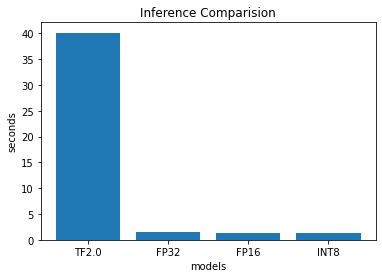

In [ ]:
import matplotlib.pyplot as plt
plt.bar(x_labels, inf_time_x_axis)
plt.ylabel('seconds')
plt.xlabel('models')
plt.title('Inference Comparision')
plt.savefig('outputneural_1.pdf')
plt.show()
# print("Performance Speedup: ",(inf_time_x_axix[0])/(inf_time_x_axix[1]))

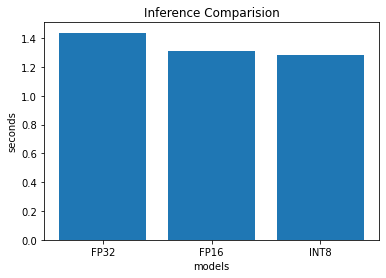

In [ ]:
plt.bar(x_labels[1:], inf_time_x_axis[1:])
plt.ylabel('seconds')
plt.xlabel('models')
plt.title('Inference Comparision')
plt.savefig('outputneural_2.pdf')
plt.show()